In [1]:
%automagic


Automagic is OFF, % prefix IS needed for line magics.


In [2]:
folder = '/home/dsc/Repos/TFM_Accident_reduction_plan_in_the_city_of_Madrid/02_Desarrollo'
!ls -ltr {folder}

total 47544
-rw-rw-r-- 1 dsc dsc     1695 oct 19 16:58 00_work_line_notes.txt
-rw-rw-r-- 1 dsc dsc   309961 oct 20 11:55 01_ciclo_prueba_muestra.ipynb
-rw-rw-r-- 1 dsc dsc   337332 oct 23 16:39 02_ciclo_prueba_muestra_ordenado.ipynb
drwxrwxr-x 2 dsc dsc     4096 oct 23 16:56 csv_files
-rw-rw-r-- 1 dsc dsc    26352 oct 29 18:05 residuo.png
-rw-rw-r-- 1 dsc dsc    28090 oct 29 18:05 estacionalidad.png
-rw-rw-r-- 1 dsc dsc    16061 oct 29 18:05 tendencia.png
-rw-rw-r-- 1 dsc dsc    36481 oct 29 18:06 todo.png
-rw-rw-r-- 1 dsc dsc    28121 oct 29 18:37 residuo_nube.png
-rw-rw-r-- 1 dsc dsc    16512 oct 29 18:38 estacionalidad_nube.png
-rw-rw-r-- 1 dsc dsc    28910 oct 29 18:38 tendencia_nube.png
-rw-rw-r-- 1 dsc dsc    48129 oct 29 18:38 todo_nube.png
-rw-rw-r-- 1 dsc dsc  2403149 nov  3 18:08 04_ciclo_prueba_muestra_serie_temporal_lio.ipynb
-rw-rw-r-- 1 dsc dsc  1919420 nov  9 12:25 04_ciclo_prueba_muestra_serie_temporal.ipynb
-rw-rw-r-- 1 dsc dsc  1741628 nov 16 17:12 serie_completa.csv


In [3]:
import os
os.getcwd()

'/home/dsc/Repos/TFM_Accident_reduction_plan_in_the_city_of_Madrid/02_Desarrollo'

In [4]:
os.chdir(folder)
os.getcwd()

'/home/dsc/Repos/TFM_Accident_reduction_plan_in_the_city_of_Madrid/02_Desarrollo'

In [5]:
!ls -ltr datos_accs_madrid.csv

-rw-rw-r-- 1 dsc dsc 24017454 nov 16 18:37 datos_accs_madrid.csv


In [6]:
import pandas as pd
df_accs = pd.read_csv("datos_accs_madrid.csv")

In [7]:
# Cargara librerias y paquetes

import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [8]:
# Análisis Exploratorio Inicial
# Ahora veamos cuantas columnas y registros tenemos:
df_accs.shape

(252998, 11)

In [9]:
df_accs.head(3)

,FECHA,HORA,DIA_SEMANA,DISTRITO,NUM_PERSONAS,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
0,01/01/2010,00:00,VIERNES,CHAMARTIN,1,COLISION_DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,20
1,01/01/2010,00:00,VIERNES,CHAMARTIN,1,COLISION_DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,50
2,01/01/2010,00:00,VIERNES,CHAMARTIN,1,COLISION_DOBLE,TURISMO,VIAJERO,MUJER,HERIDO_LEVE,40


In [10]:
df_accs.dtypes

FECHA             object
HORA              object
DIA_SEMANA        object
DISTRITO          object
NUM_PERSONAS       int64
TIPO_ACCIDENTE    object
TIPO_VEHICULO     object
TIPO_PERSONA      object
SEXO              object
LESIVIDAD         object
EDAD_APROX        object
dtype: object

In [11]:
# Borramos variables innecesarias
#drop_elements = ['FECHA', 'NUM_PERSONAS', 'TIPO_ACCIDENTE', 'TIPO_VEHICULO', 'TIPO_PERSONA', 'LESIVIDAD']
#df_accs = df_accs.drop(drop_elements, axis = 1)

In [12]:
# algunas visualizaciones para comprender mejor los datos.
# Mirar balanceo de etiquetas

In [13]:
# Comprobar valores nulos
df_accs.isnull().sum()

FECHA             0
HORA              0
DIA_SEMANA        0
DISTRITO          0
NUM_PERSONAS      0
TIPO_ACCIDENTE    0
TIPO_VEHICULO     0
TIPO_PERSONA      0
SEXO              0
LESIVIDAD         0
EDAD_APROX        0
dtype: int64

In [14]:
df_accs.groupby('FECHA').size()

FECHA
01/01/2010    52
01/01/2011    51
01/01/2012    43
01/01/2013    59
01/01/2014    50
              ..
31/12/2014    58
31/12/2015    78
31/12/2016    41
31/12/2017    27
31/12/2018    45
Length: 3287, dtype: int64

In [15]:
df_accs.groupby('HORA').size()

HORA
00:00     4729
01:00     3602
02:00     2776
03:00     2431
04:00     2131
05:00     2225
06:00     3992
07:00     6428
08:00    11759
09:00    14348
10:00    11561
11:00    12492
12:00    14473
13:00    15921
14:00    18232
15:00    14557
16:00    13590
17:00    14137
18:00    16259
19:00    18049
20:00    17244
21:00    14113
22:00    10758
23:00     7191
dtype: int64

In [16]:
df_accs.groupby('DIA_SEMANA').size()

DIA_SEMANA
DOMINGO      27249
JUEVES       38794
LUNES        36301
MARTES       37707
MIERCOLES    38697
SABADO       30798
VIERNES      43452
dtype: int64

In [17]:
df_accs.groupby('DISTRITO').size()

DISTRITO
ARGANZUELA             13050
BARAJAS                 3402
CARABANCHEL            15593
CENTRO                 17717
CHAMARTIN              18857
CHAMBERI               14466
CIUDAD LINEAL          16580
FUENCARRAL-EL PARDO    13750
HORTALEZA               8546
LATINA                 12218
MONCLOA-ARAVACA        13587
MORATALAZ               6246
PUENTE DE VALLECAS     16180
RETIRO                 13665
SALAMANCA              19269
SAN BLAS               11987
TETUAN                 13626
USERA                   8808
VICALVARO               3142
VILLA DE VALLECAS       5601
VILLAVERDE              6708
dtype: int64

In [18]:
df_accs.groupby('SEXO').size()

SEXO
HOMBRE         160165
MUJER           80717
NO_ASIGNADO     12116
dtype: int64

In [19]:
df_accs.groupby('EDAD_APROX').size()

EDAD_APROX
0               3128
10              5124
15              2593
20              9304
25             49329
30             31110
35             30169
40             26421
45             22167
50             17999
55             12454
65             13459
70              3656
75              6361
NO_ASIGNADO    19724
dtype: int64

In [20]:
# Veamos cuántos registros hay según DIA_SEMANA, como variable central:

In [21]:
df_accs.columns

Index(['FECHA', 'HORA', 'DIA_SEMANA', 'DISTRITO', 'NUM_PERSONAS',
       'TIPO_ACCIDENTE', 'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD',
       'EDAD_APROX'],
      dtype='object')

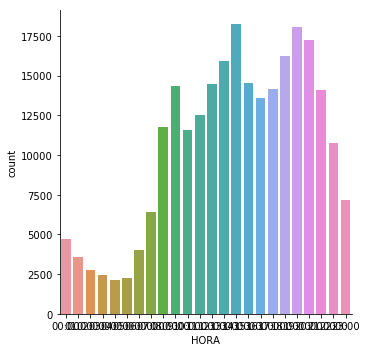

In [22]:
sb.catplot('HORA',data=df_accs,kind="count", \
           order=['00:00', '01:00', '02:00', '03:00', '04:00', '05:00', \
                  '06:00', '07:00', '08:00', '09:00', '10:00', '11:00', \
                  '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', \
                  '18:00', '19:00', '20:00', '21:00', '22:00', '23:00']
          )

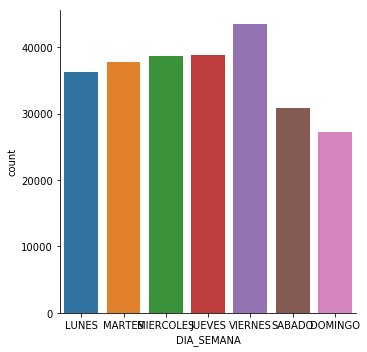

In [23]:
sb.catplot('DIA_SEMANA',data=df_accs,kind="count", \
           order=['LUNES', 'MARTES', 'MIERCOLES', 'JUEVES', 'VIERNES', 'SABADO', 'DOMINGO']
          )

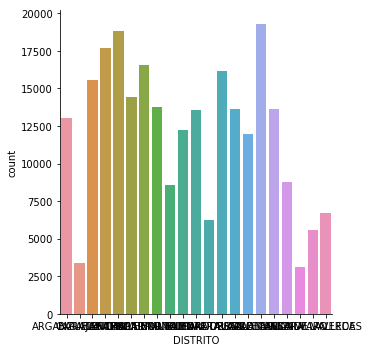

In [24]:
sb.catplot('DISTRITO',data=df_accs,kind="count", \
           order = ['ARGANZUELA', 'BARAJAS', 'CARABANCHEL', 'CENTRO', 'CHAMARTIN', \
                    'CHAMBERI', 'CIUDAD LINEAL', 'FUENCARRAL-EL PARDO', 'HORTALEZA', \
                    'LATINA', 'MONCLOA-ARAVACA', 'MORATALAZ', 'PUENTE DE VALLECAS', \
                    'RETIRO', 'SAN BLAS', 'SALAMANCA', 'TETUAN', 'USERA', 'VICALVARO', \
                    'VILLA DE VALLECAS', 'VILLAVERDE']
          )

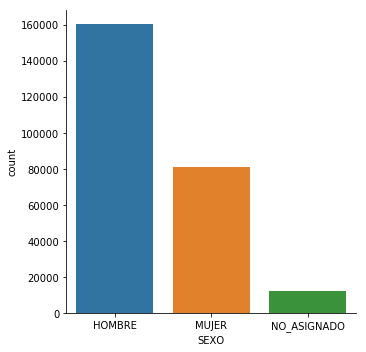

In [25]:
sb.catplot('SEXO',data=df_accs,kind="count", \
           order = ['HOMBRE', 'MUJER', 'NO_ASIGNADO']
          )

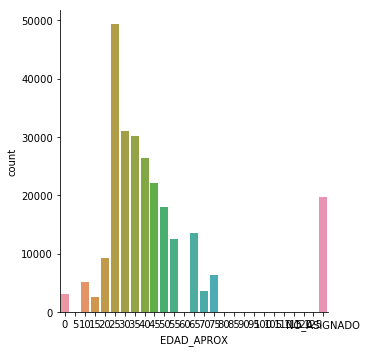

In [26]:
sb.catplot('EDAD_APROX',data=df_accs,kind="count", \
           order = ['0', '5', '10', '15', '20', '25', '30', '35', '40', '45', '50', \
                    '55', '60', '65', '70', '75', '80', '85', '90', '95', '100', \
                    '105', '110', '115', '120', '125', 'NO_ASIGNADO']
          )

In [27]:
df_accs.columns

Index(['FECHA', 'HORA', 'DIA_SEMANA', 'DISTRITO', 'NUM_PERSONAS',
       'TIPO_ACCIDENTE', 'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD',
       'EDAD_APROX'],
      dtype='object')

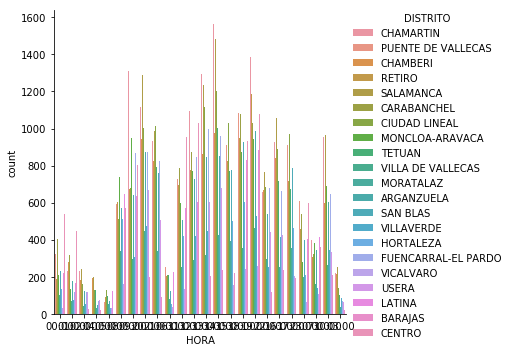

In [28]:
sb.catplot('HORA',data=df_accs,hue='DISTRITO',kind="count")

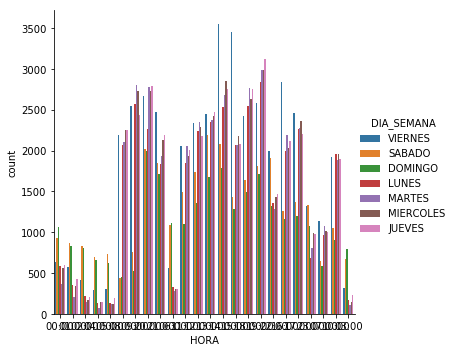

In [29]:
sb.catplot('HORA',data=df_accs,hue='DIA_SEMANA',kind="count")

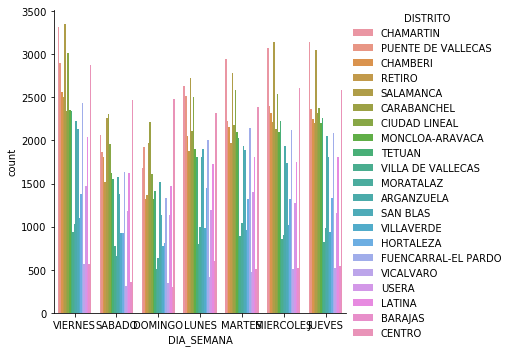

In [30]:
sb.catplot('DIA_SEMANA',data=df_accs,hue='DISTRITO',kind="count")

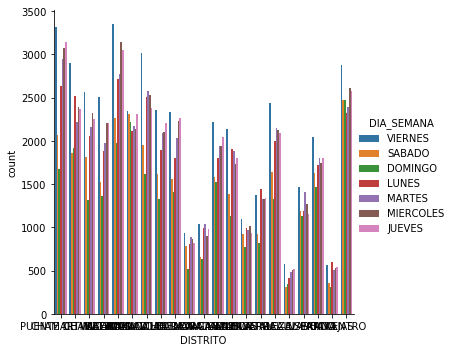

In [31]:
sb.catplot('DISTRITO',data=df_accs,hue='DIA_SEMANA',kind="count")

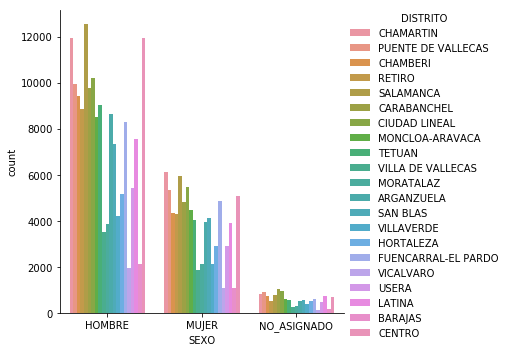

In [32]:
sb.catplot('SEXO',data=df_accs,hue='DISTRITO',kind="count")

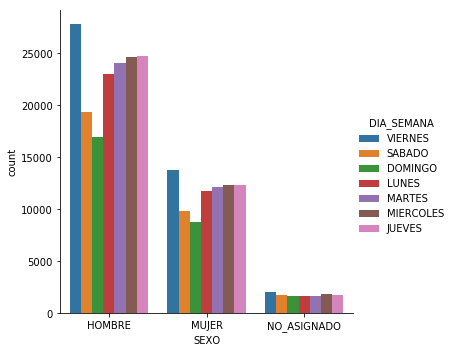

In [33]:
sb.catplot('SEXO',data=df_accs,hue='DIA_SEMANA',kind="count")

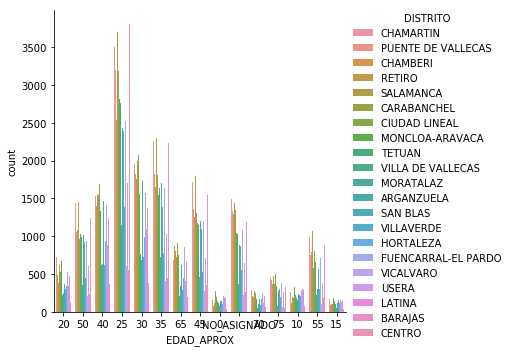

In [34]:
sb.catplot('EDAD_APROX',data=df_accs,hue='DISTRITO',kind="count")

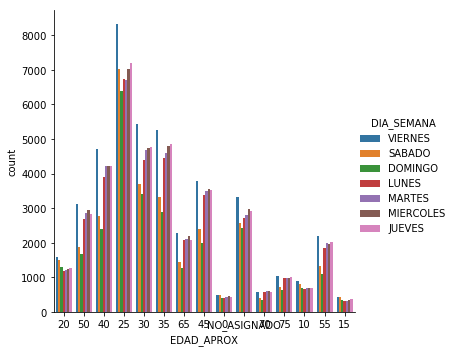

In [35]:
sb.catplot('EDAD_APROX',data=df_accs,hue='DIA_SEMANA',kind="count")

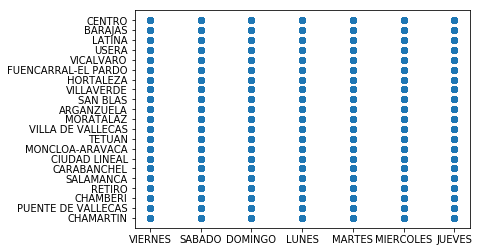

In [36]:
plt.scatter(df_accs['DIA_SEMANA'].values, df_accs['DISTRITO'].values)
plt.show()

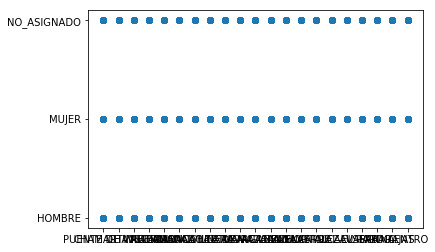

In [37]:
plt.scatter(df_accs['DISTRITO'].values, df_accs['SEXO'].values)
plt.show()

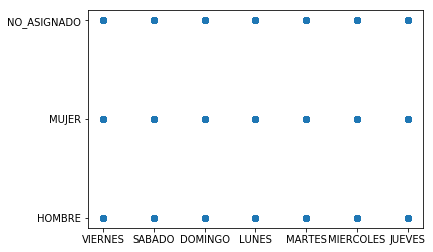

In [38]:
plt.scatter(df_accs['DIA_SEMANA'].values, df_accs['SEXO'].values)
plt.show()

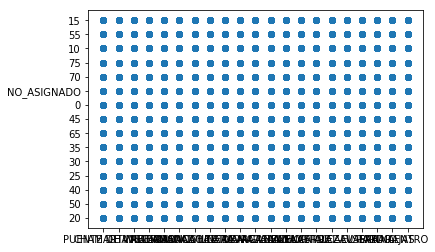

In [39]:
plt.scatter(df_accs['DISTRITO'].values, df_accs['EDAD_APROX'].values)
plt.show()

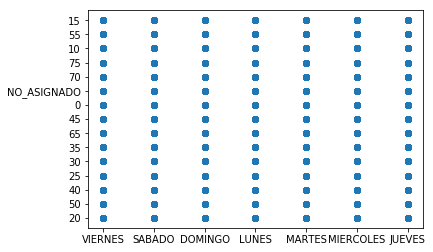

In [40]:
plt.scatter(df_accs['DIA_SEMANA'].values, df_accs['EDAD_APROX'].values)
plt.show()

In [41]:
# Mapeo de datos

In [42]:
#Filtro: Columnas que empiezan por xxx
#filtro_borrar = [col for col in df_accs if col.startswith('NUM_PERS')]
# borrar columnas sobrantes:
#df_accs = df_accs.drop(columns=filtro_borrar)

In [43]:
# crear sample
df_accs_sample = df_accs.sample(n=10000).reset_index(drop=True)

In [44]:
df_accs_sample.head(1)

,FECHA,HORA,DIA_SEMANA,DISTRITO,NUM_PERSONAS,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
0,21/07/2012,18:00,SABADO,FUENCARRAL-EL PARDO,3,COLISION_DOBLE,TURISMO,VIAJERO,MUJER,INGRESO_LEVE,45


In [45]:
df_accs_sample.columns

Index(['FECHA', 'HORA', 'DIA_SEMANA', 'DISTRITO', 'NUM_PERSONAS',
       'TIPO_ACCIDENTE', 'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD',
       'EDAD_APROX'],
      dtype='object')

In [46]:
df_accs_sample.dtypes

FECHA             object
HORA              object
DIA_SEMANA        object
DISTRITO          object
NUM_PERSONAS       int64
TIPO_ACCIDENTE    object
TIPO_VEHICULO     object
TIPO_PERSONA      object
SEXO              object
LESIVIDAD         object
EDAD_APROX        object
dtype: object

In [47]:
df_accs_sample['DISTRITO'].unique()

array(['FUENCARRAL-EL PARDO', 'CARABANCHEL', 'MORATALAZ', 'CHAMBERI',
       'MONCLOA-ARAVACA', 'PUENTE DE VALLECAS', 'VILLAVERDE', 'CHAMARTIN',
       'USERA', 'BARAJAS', 'SALAMANCA', 'ARGANZUELA', 'CENTRO', 'LATINA',
       'HORTALEZA', 'CIUDAD LINEAL', 'RETIRO', 'VILLA DE VALLECAS',
       'SAN BLAS', 'TETUAN', 'VICALVARO'], dtype=object)

In [48]:
# Comprobar valores nulos
df_accs_sample.isnull().sum()

FECHA             0
HORA              0
DIA_SEMANA        0
DISTRITO          0
NUM_PERSONAS      0
TIPO_ACCIDENTE    0
TIPO_VEHICULO     0
TIPO_PERSONA      0
SEXO              0
LESIVIDAD         0
EDAD_APROX        0
dtype: int64

In [49]:
df_accs_sample.shape

(10000, 11)

In [50]:
# No limitar display de columnas
import pandas as pd
from IPython.display import display

pd.options.display.max_columns = None
display(df_accs_sample.head(1))

,FECHA,HORA,DIA_SEMANA,DISTRITO,NUM_PERSONAS,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
0,21/07/2012,18:00,SABADO,FUENCARRAL-EL PARDO,3,COLISION_DOBLE,TURISMO,VIAJERO,MUJER,INGRESO_LEVE,45


In [51]:
df_accs_sample[0:1]

,FECHA,HORA,DIA_SEMANA,DISTRITO,NUM_PERSONAS,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
0,21/07/2012,18:00,SABADO,FUENCARRAL-EL PARDO,3,COLISION_DOBLE,TURISMO,VIAJERO,MUJER,INGRESO_LEVE,45


In [52]:
# Etiquetamos mediante Label Encoding
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder() 

In [53]:
df_accs_sample.columns

Index(['FECHA', 'HORA', 'DIA_SEMANA', 'DISTRITO', 'NUM_PERSONAS',
       'TIPO_ACCIDENTE', 'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD',
       'EDAD_APROX'],
      dtype='object')

In [54]:
# Convertir a columnas numéricas (Estandarización de variables)
df_accs_sample['FECHA']= lab.fit_transform(df_accs_sample['FECHA'])
df_accs_sample['HORA']= lab.fit_transform(df_accs_sample['HORA'])
df_accs_sample['DIA_SEMANA']= lab.fit_transform(df_accs_sample['DIA_SEMANA'])
df_accs_sample['DISTRITO']= lab.fit_transform(df_accs_sample['DISTRITO'])
#df_accs_sample['NUM_PERSONAS']= lab.fit_transform(df_accs_sample['NUM_PERSONAS'])
df_accs_sample['TIPO_ACCIDENTE']= lab.fit_transform(df_accs_sample['TIPO_ACCIDENTE'])
df_accs_sample['TIPO_VEHICULO']= lab.fit_transform(df_accs_sample['TIPO_VEHICULO'])
df_accs_sample['TIPO_PERSONA']= lab.fit_transform(df_accs_sample['TIPO_PERSONA'])
df_accs_sample['SEXO']= lab.fit_transform(df_accs_sample['SEXO'])
df_accs_sample['LESIVIDAD']= lab.fit_transform(df_accs_sample['LESIVIDAD'])
df_accs_sample['EDAD_APROX']= lab.fit_transform(df_accs_sample['EDAD_APROX'])

In [55]:
df_accs_sample.head(1)

,FECHA,HORA,DIA_SEMANA,DISTRITO,NUM_PERSONAS,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
0,2045,18,5,7,3,6,9,3,1,2,8


In [56]:
df_accs_sample.dtypes

FECHA             int64
HORA              int64
DIA_SEMANA        int64
DISTRITO          int64
NUM_PERSONAS      int64
TIPO_ACCIDENTE    int64
TIPO_VEHICULO     int64
TIPO_PERSONA      int64
SEXO              int64
LESIVIDAD         int64
EDAD_APROX        int64
dtype: object

In [57]:
list(df_accs_sample["NUM_PERSONAS"][:10])

[3, 3, 3, 1, 2, 1, 1, 1, 1, 1]

In [58]:
list(df_accs_sample["DISTRITO"][:10])

[7, 2, 2, 11, 5, 10, 11, 12, 12, 20]

#  Extracción de características , escala característica, reducción de dimensionalidad y prueba de flujos con estimador final adaptado

## Se utilizarán los hiperparámetros para:
#### Regresión Logisitica
#### Máquinas de vectores soporte
#### Árbol de decisión

## TAREAS:
#### Seguimiento con datos de prueba de puntuación
#### Comparar las exactitudes del modelo de pipeline
#### Identificar el “mejor” modelo, lo que significa que tiene la mayor precisión en nuestros datos de prueba
#### Persistir (guardar en archivo) todo el pipeline del “mejor” modelo

In [59]:
# Load environment
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
#from sklearn.externals import joblib
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree

In [60]:
df_accs_sample.head(1)

,FECHA,HORA,DIA_SEMANA,DISTRITO,NUM_PERSONAS,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
0,2045,18,5,7,3,6,9,3,1,2,8


In [61]:
df_accs_sample.columns

Index(['FECHA', 'HORA', 'DIA_SEMANA', 'DISTRITO', 'NUM_PERSONAS',
       'TIPO_ACCIDENTE', 'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD',
       'EDAD_APROX'],
      dtype='object')

In [62]:
# Load and train-test split the data
X = np.array(df_accs_sample.drop('DISTRITO', 1))
y = np.array(df_accs_sample["DISTRITO"])
X.shape

(10000, 10)

In [63]:
# Create 2 groups each with input and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [64]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [65]:
mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='saga', penalty='l1', class_weight='balanced', max_iter=10000).fit(X_train, y_train)

In [66]:
from sklearn import metrics

In [67]:
metrics.accuracy_score(y_train, mul_lr.predict(X_train))

0.072875

In [68]:
metrics.accuracy_score(y_test, mul_lr.predict(X_test))

0.0535

In [69]:
########## completo

In [70]:
# Convertir a columnas numéricas (Estandarización de variables)
df_accs['FECHA']= lab.fit_transform(df_accs['FECHA'])
df_accs['HORA']= lab.fit_transform(df_accs['HORA'])
df_accs['DIA_SEMANA']= lab.fit_transform(df_accs['DIA_SEMANA'])
df_accs['DISTRITO']= lab.fit_transform(df_accs['DISTRITO'])
#df_accs['NUM_PERSONAS']= lab.fit_transform(df_accs['NUM_PERSONAS'])
df_accs['TIPO_ACCIDENTE']= lab.fit_transform(df_accs['TIPO_ACCIDENTE'])
df_accs['TIPO_VEHICULO']= lab.fit_transform(df_accs['TIPO_VEHICULO'])
df_accs['TIPO_PERSONA']= lab.fit_transform(df_accs['TIPO_PERSONA'])
df_accs['SEXO']= lab.fit_transform(df_accs['SEXO'])
df_accs['LESIVIDAD']= lab.fit_transform(df_accs['LESIVIDAD'])
df_accs['EDAD_APROX']= lab.fit_transform(df_accs['EDAD_APROX'])

In [71]:
df_accs.head(1)

,FECHA,HORA,DIA_SEMANA,DISTRITO,NUM_PERSONAS,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
0,0,0,6,4,1,7,9,0,0,2,3


In [72]:
df_accs.dtypes

FECHA             int64
HORA              int64
DIA_SEMANA        int64
DISTRITO          int64
NUM_PERSONAS      int64
TIPO_ACCIDENTE    int64
TIPO_VEHICULO     int64
TIPO_PERSONA      int64
SEXO              int64
LESIVIDAD         int64
EDAD_APROX        int64
dtype: object

In [73]:
list(df_accs["NUM_PERSONAS"][:10])

[1, 1, 1, 7, 7, 7, 7, 7, 7, 7]

In [74]:
list(df_accs["DISTRITO"][:10])

[4, 4, 4, 12, 12, 12, 12, 12, 12, 12]

#  Extracción de características , escala característica, reducción de dimensionalidad y prueba de flujos con estimador final adaptado

## Se utilizarán los hiperparámetros para:
#### Regresión Logisitica
#### Máquinas de vectores soporte
#### Árbol de decisión

## TAREAS:
#### Seguimiento con datos de prueba de puntuación
#### Comparar las exactitudes del modelo de pipeline
#### Identificar el “mejor” modelo, lo que significa que tiene la mayor precisión en nuestros datos de prueba
#### Persistir (guardar en archivo) todo el pipeline del “mejor” modelo

In [75]:
# Load environment
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
#from sklearn.externals import joblib
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree

In [76]:
df_accs.head(1)

,FECHA,HORA,DIA_SEMANA,DISTRITO,NUM_PERSONAS,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
0,0,0,6,4,1,7,9,0,0,2,3


In [77]:
df_accs.columns

Index(['FECHA', 'HORA', 'DIA_SEMANA', 'DISTRITO', 'NUM_PERSONAS',
       'TIPO_ACCIDENTE', 'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD',
       'EDAD_APROX'],
      dtype='object')

In [78]:
# Load and train-test split the data
X = np.array(df_accs.drop('DISTRITO', 1))
y = np.array(df_accs["DISTRITO"])
X.shape

(252998, 10)

In [79]:
# Create 2 groups each with input and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [80]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [81]:
mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='saga', penalty='l2', class_weight='balanced', max_iter=10000).fit(X_train, y_train)

In [82]:
from sklearn import metrics

In [83]:
metrics.accuracy_score(y_train, mul_lr.predict(X_train))

0.06889890216306485

In [84]:
metrics.accuracy_score(y_test, mul_lr.predict(X_test))

0.06733201581027667

In [ ]:
###############

In [78]:
# Construct some pipelines
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', LogisticRegression(random_state=7))])

pipe_svm = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', svm.SVC(random_state=7))])

pipe_dt = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', tree.DecisionTreeClassifier(random_state=7))])

In [79]:
# List of pipelines for ease of iteration
pipelines = [pipe_lr, pipe_svm, pipe_dt]

In [80]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Support Vector Machine', 2: 'Decision Tree'}

In [81]:
# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
# Compare accuracies
for idx, val in enumerate(pipelines):
    print('%s pipeline test accuracy: %.3f' % (pipe_dict[idx], val.score(X_test, y_test)))

Logistic Regression pipeline test accuracy: 0.079


In [ ]:
# Identify the most accurate model on test data
best_acc = 0.0
best_clf = 0
best_pipe = ''
for idx, val in enumerate(pipelines):
    if val.score(X_test, y_test) > best_acc:
        best_acc = val.score(X_test, y_test)
        best_pipe = val
    best_clf = idx
print('Classifier with best accuracy: %s' % pipe_dict[best_clf])